In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [6]:
df=pd.read_csv('tested.csv',usecols=['Age','Fare','Survived'])

In [7]:
df

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [12]:
df.isnull().sum()

Survived    0
Age         0
Fare        1
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13156\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [10]:
df.fillna({'Age': df['Age'].mean()}, inplace=True)


In [11]:
df


,Survived,Age,Fare
0,0,34.50000,7.8292
1,1,47.00000,7.0000
2,0,62.00000,9.6875
3,0,27.00000,8.6625
4,1,22.00000,12.2875
...,...,...,...
413,0,30.27259,8.0500
414,1,39.00000,108.9000
415,0,38.50000,7.2500
416,0,30.27259,8.0500


In [13]:
df.fillna({'Fare': df['Fare'].mean()}, inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [15]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [16]:
x

,Age,Fare
0,34.50000,7.8292
1,47.00000,7.0000
2,62.00000,9.6875
3,27.00000,8.6625
4,22.00000,12.2875
...,...,...
413,30.27259,8.0500
414,39.00000,108.9000
415,38.50000,7.2500
416,30.27259,8.0500


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\HP\AppData\Local\Temp\ipykernel_13156\1339419168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


Text(0.5, 1.0, 'age QQ plot')

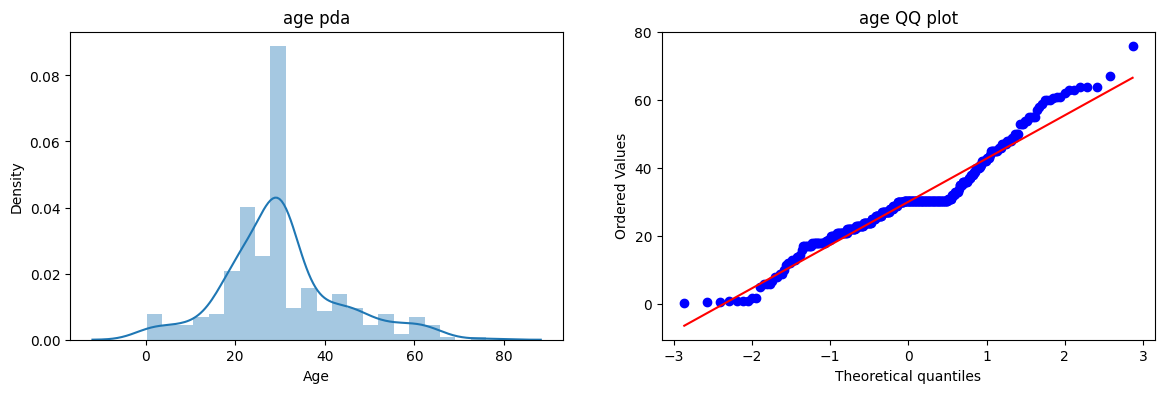

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title("age pda")

plt.subplot(122)
# sns.probplot(x_train['Age'],dist='norm',plot=plt)
stats.probplot(x_train['Age'], dist='norm', plot=plt)

plt.title("age QQ plot")

## fare is not normaly distributed

C:\Users\HP\AppData\Local\Temp\ipykernel_13156\2277820004.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


Text(0.5, 1.0, 'fare QQ plot')

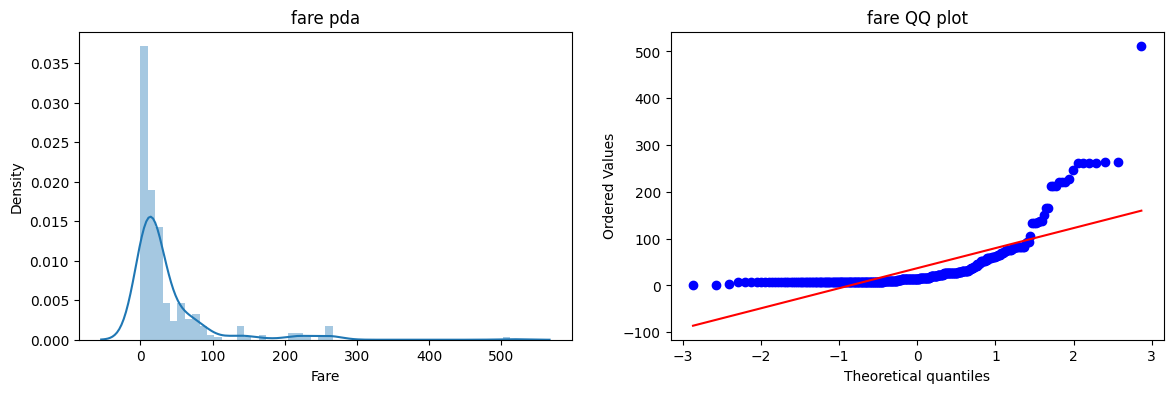

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title("fare pda")

plt.subplot(122)
# sns.probplot(x_train['Age'],dist='norm',plot=plt)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)

plt.title("fare QQ plot")

In [26]:
trf=FunctionTransformer(func=np.log1p)

In [28]:
x_train_trans=trf.fit_transform(x_train)
x_test_trans=trf.fit_transform(x_test)

Text(0.5, 1.0, 'age after log')

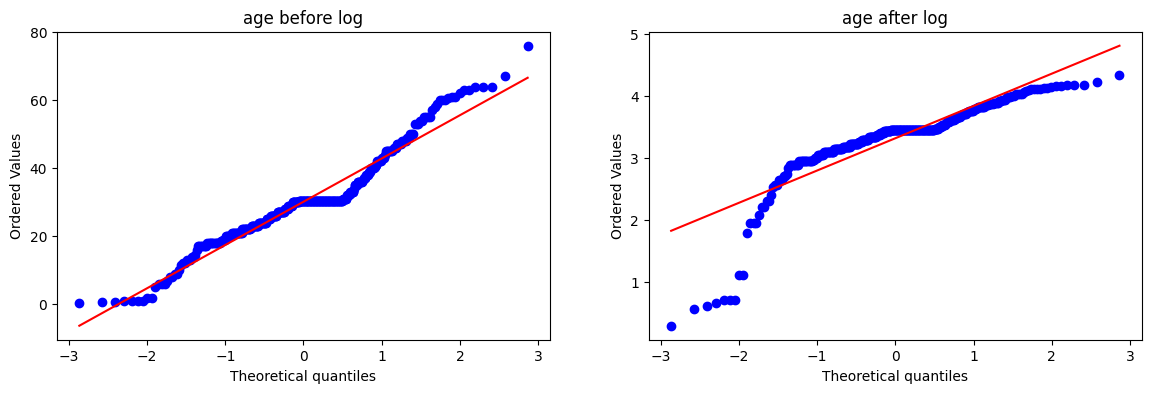

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
# sns.distplot(x_train['Age'])
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title("age before log")

plt.subplot(122)
# sns.probplot(x_train['Age'],dist='norm',plot=plt)
stats.probplot(x_train_trans['Age'], dist='norm', plot=plt)

plt.title("age after log")

Text(0.5, 1.0, 'fare after log QQ plot')

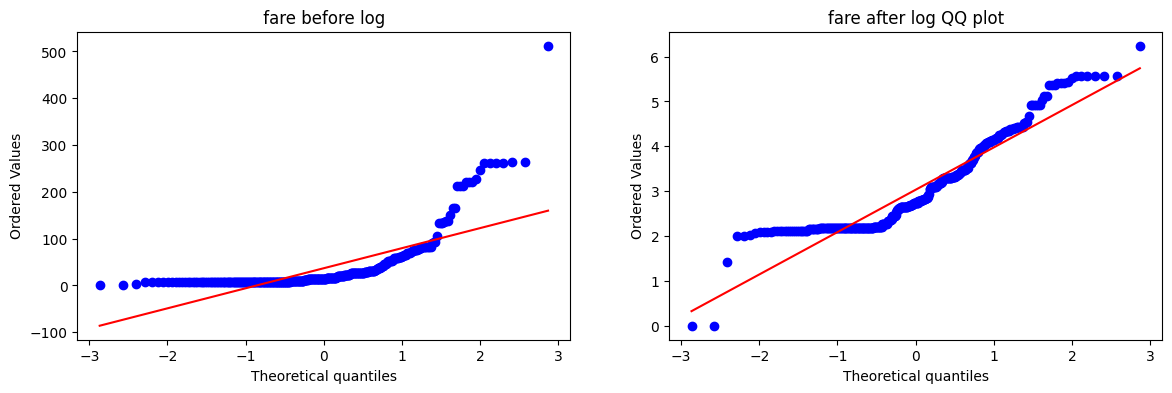

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(121)
# sns.distplot(x_train['Fare'])
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title(" fare before log ")

plt.subplot(122)
# sns.probplot(x_train['Age'],dist='norm',plot=plt)
stats.probplot(x_train_trans['Fare'], dist='norm', plot=plt)

plt.title("fare after log QQ plot")

In [35]:
!git init

Reinitialized existing Git repository in C:/Users/HP/ml/.git/


In [38]:
!git remote add origin https://github.com/komalrani2404/Learn_ML
!git add Function Transformer.ipynb


error: remote origin already exists.
fatal: pathspec 'Function' did not match any files


In [39]:
!git commit -m "Function Transforme"
!git branch -M main
!git push -u origin main

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Encoding_categorical_variable.ipynb
	modified:   column_transfermar.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	EDA.ipynb
	Function Transformer.ipynb
	Pipeline.ipynb
	Social_Network_Ads.csv
	Unthinkable_Shortlist_Candidates2k26.xlsx
	Untitled.ipynb
	Untitled1.ipynb
	Untitled2.ipynb
	Wine.csv
	covid_toy.csv
	customer.csv
	flight.csv
	former_names.csv
	iris.csv
	matches - matches.csv
	models/
	numpy.ipynb
	one_hot_Encoding.ipynb
	output.html
	tested.csv
	tips.csv

no changes added to commit (use "git add" and/or "git commit -a")
branch 'main' set up to track 'origin/main'.


Everything up-to-date
